## Exploring the Data Distribution

1. Percentiles and Boxplot
2. Frequency Table, Histogram and Density Histogram

## 1. Percentiles and Boxplot 

Percentiles divide your data into 100 equal parts key percentiles.
1. 25th percentiles(Q1): 25% of data below this below
2. 50th percentiles(median): The middle value
3. 75th percentiles(Q3): 75% of districts have population below this value
4. IQR(InterQuartileRange):Q3-Q1(spread of middle 60% of data)


In [11]:
import pandas as pd
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
data=df['Fare']
#lets try to implement above percentiles concepts
import pandas 

percentiles=data.quantile([.05,.25,.5,.75,.95]) #quantiles() is pandas built-in functions
print(f"5th percentiles:{percentiles[0.05]:.2f}")
print(f"25th percentiles:{percentiles[0.25]:.2f}")
print(f"50th percentiles:{percentiles[0.50]:.2f}")
print(f"75th percentiles:{percentiles[0.75]:.2f}")
print(f"95th percentiles:{percentiles[0.95]:.2f}")
print(f"Inter Quartile Range(IQR):{percentiles[0.75]-percentiles[0.25]:.2f}")


5th percentiles:7.22
25th percentiles:7.91
50th percentiles:14.45
75th percentiles:31.00
95th percentiles:112.08
Inter Quartile Range(IQR):23.09


In above you can get confused with 'percentiles=data.quantile([.05,.25,.5,.75,.95])' what code is doing to computes the specified percentiles. And percentiles[0.05] access the 5th percentiles and matches with your dataset from 'Data'

([], [])

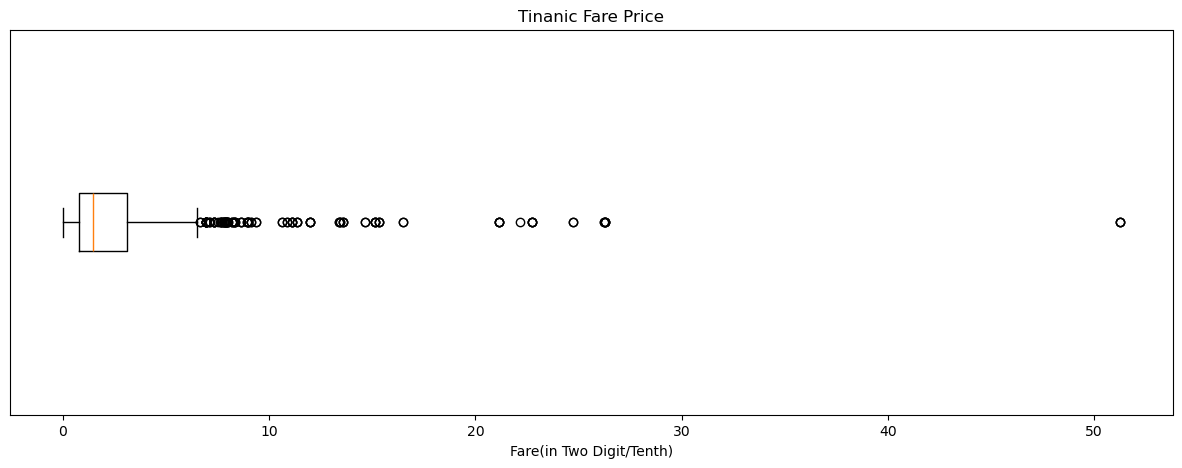

In [33]:
#Boxblot 
#lets try to plot boxplot
#create boxplot

import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.boxplot(data/10,vert=False) #vert=False gives horzotally plotted boxplot. if True i gives Vertically plotted boxplot
plt.title("Tinanic Fare Price")
plt.xlabel("Fare(in Two Digit/Tenth)")
plt.yticks([])

Note: Vertical line of Edges represents minimum(starting data) and maximum (last data), horizontal Edges of rectangle represents
Q1 and Q3 and middle red line represent median. Rest Dots are Outliers.

## Frequency Table, Histogram and Density Histogram

frequency table divides data into binns/range/group and counts how many values fall into each range.
1. Bins-> is equally spaced intervals(e.g. 0-10,10-20,20-30 etc)
2. Counts -> Numbers of districts in each bins
3. Range -> Max or Min of data(0 is min and 100 is max in where 10 is equally spaced interals.

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
#lets try to create frequecy table of column Age
import numpy as np
import pandas as pd
data_Age=df['Age']
num_bins=10 #num_bins+1 generates the correct number of edges for N bin

#creating min and max Age range using tuple unpacking
min_dataAge,max_dataAge=data_age.min(),data_age.max()

#creating bins using np.linspace(),min(),max() where linspace() generate equal spaced intervals from min_dataAge to max_dataAge
Age_intervals=np.linspace(min_dataAge,max_dataAge,num_bins+1)

#Assigning Each age data value to  corresponding age intervals or bins
#include_lowest: checks and ensure lowest value that is age is included in 1st interval/bin
#Value_counts() counts the no of age data falls into each age intervals/bins
#sorts the bins in ascending order
Age_freq_table=pd.cut(data_Age,bins=Age_intervals,include_lowest=True).value_counts().sort_index()
#converting data into well structured dataframe dataset
Freq_Age_table=pd.DataFrame(Age_freq_table)
#diplaying dataset
Freq_Age_table

,count
Age,
"(0.419, 8.378]",54
"(8.378, 16.336]",46
"(16.336, 24.294]",177
"(24.294, 32.252]",169
"(32.252, 40.21]",118
"(40.21, 48.168]",70
"(48.168, 56.126]",45
"(56.126, 64.084]",24
"(64.084, 72.042]",9


Text(0, 0.5, 'Count of Age ')

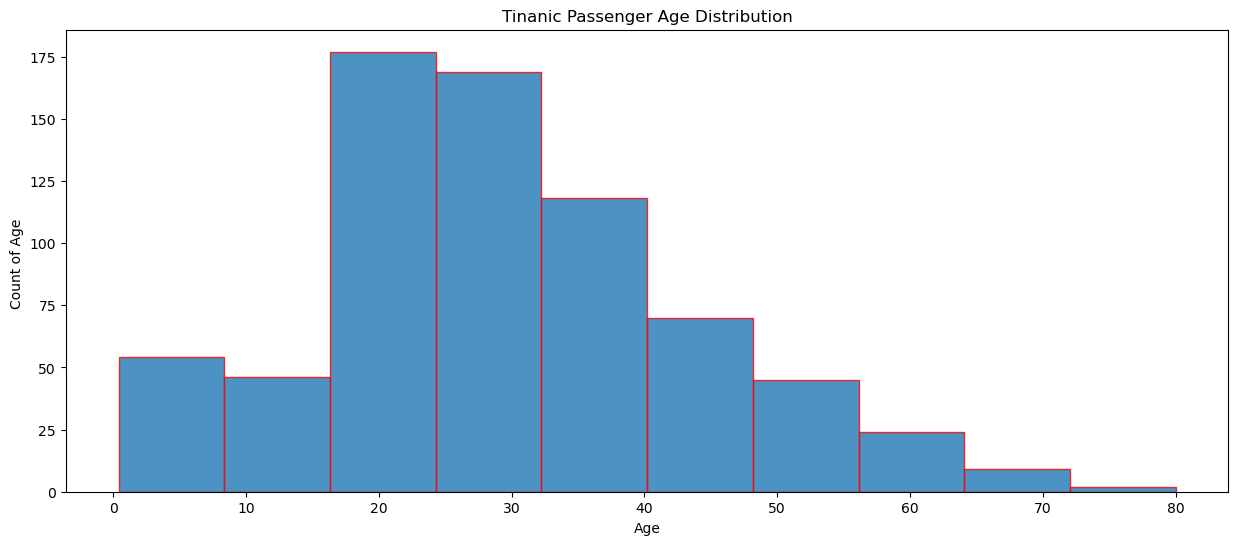

In [67]:
#lets create histogram for Freq_Age_Table
#lets keep number of edge is 10 
num_bins=10
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
#creating histograms
n,bins,patches=plt.hist(df['Age'],bins=num_bins,edgecolor='red',alpha=0.8)
plt.title("Tinanic Passenger Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count of Age ")

## confusion Clearance

I want to share line of code where get stuck for almost a day. And it is part of learning phase. Many of beginner finds  un-easy on this line  'n,bins,patches=plt.hist(df['Selected_col'],bins=num_bins,edgecolor='red',alpha=0.8)' and what is role of n,bins and patches in histogram plot.Answer is when we creates hist() method, hist() returns three values n, bins, patches. 'n' is numpy array containing the count of values in each bins. 'bins' is also a numpy array representing the edges of the bins and 'patches' is a list of patch object representing each bar in the histogram. Thus, assignnment n,binsm patches unpack  3 pieces of information that matplotlib generate when creating a histogram. Therefore Return values must be handle by assigning them. I think or not sure,assign value must be for future uses or customizations. 

### Density Histogram 

A density histogram plot is A smoothed,Continous version of a histogram.From Above histogram plot we know that , we use histogram for  precise counts per bins. Then why we need Density histogram? We need it for comparing multiple distribution,showing overall shape without working without working with continuous data.Previous we use 'matplotlib' but here we are going to use 'seaborn'. Lets jump into implementation.


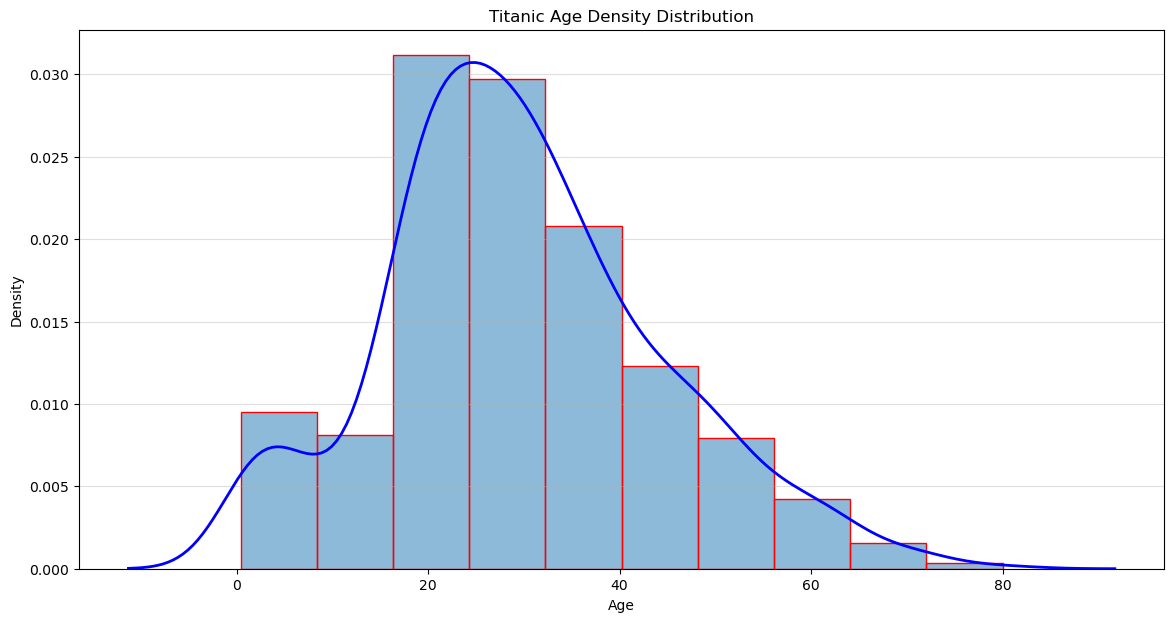

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (14,7))
sns.histplot(df['Age'],stat='density',bins=10,alpha=0.5,edgecolor='red')
sns.kdeplot(df['Age'],linewidth=2,color='blue')
plt.title("Titanic Age Density Distribution")
plt.xlabel("Age")
plt.ylabel("Density")
plt.grid(axis='y',alpha=0.4)

Note: n,bins,patches in kde(creates the smooth curve) dynamically handles these return values

### Why sns.histogram() pass parameter stat='density' ?

Seaborn converts raw counts into probability densities, ensuring that the total area under the histogram sum to 1. This rescale the histogram so that 
area represents relative proportions rather than than absolute counts.